In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [311]:
path = "arguments-training.tsv"
df = pd.read_table(path, sep = "\t")
df.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [312]:
# renaming the Argument ID column so that there is no space
df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [313]:
l_path = "labels-training.tsv"
temp_labels_df = pd.read_table(l_path, sep="\t")
temp_labels_df.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [314]:
# renaming the Argument ID column so that there is no space
temp_labels_df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [315]:
pd.set_option('display.max_columns', None)
temp_labels_df.head()

,Argument_ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


## data preparation

In [316]:
# label the data using a common identifier
training_data=pd.merge(df, temp_labels_df, on="Argument_ID")

In [317]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5389,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
5390,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5391,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1


## text preprocessing

In [318]:
import spacy

nlp=spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc=nlp(text)
    # set lowercase and remove punctuation
    processed_text=" ".join([token.text.lower() for token in doc if not token.is_punct])
    return processed_text

# Apply text preprocessing to your text data
training_data["processed_text"]=training_data["Premise"].apply(preprocess_text)


In [319]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,processed_text
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,factory farming allows for the production of c...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,on the one hand we have russia killing countle...
5389,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,the subsidies were originally intended to ensu...
5390,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,these products come mainly from large enterpri...
5391,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,subsidies often make farmers in recipient coun...


In [320]:
for feature in training_data:
    print(feature)

Argument_ID
Conclusion
Stance
Premise
Self-direction: thought
Self-direction: action
Stimulation
Hedonism
Achievement
Power: dominance
Power: resources
Face
Security: personal
Security: societal
Tradition
Conformity: rules
Conformity: interpersonal
Humility
Benevolence: caring
Benevolence: dependability
Universalism: concern
Universalism: nature
Universalism: tolerance
Universalism: objectivity
processed_text


## transform labels into probabilities

In [321]:

# extract the label columns and store them in a separate DataFrame
label_columns=training_data[["Self-direction: thought",
"Self-direction: action",
"Stimulation",
"Hedonism",
"Achievement",
"Power: dominance",
"Power: resources",
"Face",
"Security: personal",
"Security: societal",
"Tradition",
"Conformity: rules",
"Conformity: interpersonal",
"Humility",
"Benevolence: caring",
"Benevolence: dependability",
"Universalism: concern",
"Universalism: nature",
"Universalism: tolerance",
"Universalism: objectivity"]]

# convert the label columns to a multi-class format (one-hot encoding)
training_data['label'] = label_columns.apply(lambda row: row.to_list(), axis=1)


In [322]:
# found a row with no labels

training_data.iloc[3358]

Argument_ID                                                              A26098
Conclusion                                 We should adopt a multi-party system
Stance                                                                  against
Premise                       a multi-party system offers too many options a...
Self-direction: thought                                                       0
Self-direction: action                                                        0
Stimulation                                                                   0
Hedonism                                                                      0
Achievement                                                                   0
Power: dominance                                                              0
Power: resources                                                              0
Face                                                                          0
Security: personal                      

In [323]:
# drop the row with no labels

training_data.drop(index=3358, inplace=True)

In [324]:
training_data["label"]

0       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
1       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
2       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
3       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...
4       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ...
                              ...                        
5388    [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
5389    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...
5390    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5391    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, ...
5392    [0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
Name: label, Length: 5392, dtype: object

In [325]:
# reset the row indices
training_data=training_data.reset_index(drop=True)

#print(training_data)


In [326]:
labels=list(training_data["label"])

In [327]:
final=[]

for sublist in labels:
    sum_values=sum(sublist)
    probability_distribution=[value/sum_values for value in sublist]
    final.append(probability_distribution)

In [328]:
training_data["label"]=final

In [329]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,processed_text,label
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,we should ban human cloning as it will only ca...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,fast food should be banned because it is reall...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,sometimes economic sanctions are the only thin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ..."
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,capital punishment is sometimes the only optio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,factory farming allows for the production of c...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,on the one hand we have russia killing countle...,"[0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0..."
5388,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,the subsidies were originally intended to ensu...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ..."
5389,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,these products come mainly from large enterpri...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5390,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,subsidies often make farmers in recipient coun...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.166..."


## spacy

In [330]:
import spacy

In [331]:
nlp=spacy.load("en_core_web_sm")

In [332]:
doc=nlp(training_data["processed_text"][5387])

In [333]:
print(doc)

on the one hand we have russia killing countless ukrainians and committing sabotage in britain and the czech republic and on the other hand we have reluctant united states that is switching between isolationist and interventionist policies every 4 8 years    i stand convinced that in order for the european union to move forward it must begin to introduce measures for the security of both the current member states as well as the future member states that are endangered due to foreign aggression and bring the responsibility of continental safety firmly in our own hands if europe is to find the peace it must have the means to create peace by being able to protect itself against hostile foreign influences


In [334]:
ents=list(doc.ents) #check for entities in the argument

In [335]:
ents

[russia, britain, the czech republic, 4 8 years, the european union, europe]

In [336]:
# get POS

for token in doc:
    print(token.text, token.pos_)

on ADP
the DET
one NUM
hand NOUN
we PRON
have VERB
russia PROPN
killing VERB
countless ADJ
ukrainians NOUN
and CCONJ
committing VERB
sabotage NOUN
in ADP
britain PROPN
and CCONJ
the DET
czech PROPN
republic PROPN
and CCONJ
on ADP
the DET
other ADJ
hand NOUN
we PRON
have VERB
reluctant ADJ
united PROPN
states PROPN
that PRON
is AUX
switching VERB
between ADP
isolationist NOUN
and CCONJ
interventionist ADJ
policies NOUN
every DET
4 NUM
8 NUM
years NOUN
    SPACE
i PRON
stand VERB
convinced VERB
that SCONJ
in ADP
order NOUN
for SCONJ
the DET
european PROPN
union PROPN
to PART
move VERB
forward ADV
it PRON
must AUX
begin VERB
to PART
introduce VERB
measures NOUN
for ADP
the DET
security NOUN
of ADP
both PRON
the DET
current ADJ
member NOUN
states NOUN
as ADV
well ADV
as ADP
the DET
future ADJ
member NOUN
states NOUN
that PRON
are AUX
endangered VERB
due ADP
to ADP
foreign ADJ
aggression NOUN
and CCONJ
bring VERB
the DET
responsibility NOUN
of ADP
continental ADJ
safety NOUN
firmly ADV
in A

In [337]:
nouns=[]

for i in range(training_data.shape[0]):
    doc=nlp(training_data["processed_text"][i])
    for token in doc:
        if token.pos_=="NOUN":
            nouns.append(token)
            
print(nouns)

[cloning, issues, bunch, humans, food, health, sanctions, thing, governments, action, punishment, option, criminals, crimes, factory, farming, production, food, necessity, families, income, weapons, peace, times, student, classes, strike, laws, people, life, chance, life, austerity, regime, impact, society, austerity, regime, generations, debts, gender, language, way, group, sexes, men, women, use, words, sanctions, sanction, countries, factory, farming, health, safety, corners, family, farms, products, news, organizations, forms, media, internet, subsidization, parades, group, discrimination, gays, parade, children, adult, surgery, child, adult, child, choice, bodies, whim, child, prostitution, females, stem, cell, research, development, treatments, number, conditions, algorithms, situation, market, organ, trade, people, law, organs, form, times, drugs, floodgates, legalization, drugs, weapons, threat, world, telemarketing, people, school, prayer, array, beliefs, non, beliefs, student

In [338]:
noun_chunks=[]

for i in range(training_data.shape[0]):
    doc=nlp(training_data["processed_text"][i])
    noun_chunks.append(list(doc.noun_chunks))
            
print(noun_chunks)

[[we, human cloning, it, huge issues, you, a bunch, the same humans, all], [fast food, it, your health], [economic sanctions, the only thing, that, the corrupt governments, action], [capital punishment, the only option, criminals, more crimes], [factory farming, the production, cheap food, which, a necessity, families, a low income], [nuclear weapons, the peace, uncertain times], [it, the student, it, his classes], [three strike laws, young people, life, a chance, their life], [austerity regime, very negative impact, society], [we, an austerity regime, it, future generations, the debts, we], [gender neutral language, just another way, a group, we, two sexes men, women, they, the use, words], [economic sanctions, a non military sanction, countries], [factory farming, too many health and safety corners, smaller family farms, this, potentially unsafe and unhealthy products], [it, news organizations, new forms, media, the internet, it, subsidization], [parades, every group, it, discriminat

In [339]:
# lemmatization of verbs

verbs={}

for i in range(training_data.shape[0]):
    doc=nlp(training_data["processed_text"][i])
    for word in doc:
        if word.pos_=="VERB":
            print(word, word.lemma_)
            if word in verbs:
                verbs[word.lemma_] += 1
            else:
                verbs[word.lemma_] = 1
                
print(verbs)
    

ban ban
cause cause
have have
running run
acting act
banned ban
get get
take take
keep keep
committing commit
allows allow
surviving survive
help help
keep keep
allowed allow
wants want
pray pray
interfering interfere
cause cause
put put
straight straight
adopting adopt
have have
adopt adopt
expect expect
settle settle
run run
try try
please please
have have
provide provide
use use
cuts cut
opposed oppose
leads lead
transfer transfer
requires require
are be
give give
grown grow
formed form
looks look
banned ban
make make
legalize legalize
regulated regulate
meaning mean
subsidized subsidize
lead lead
reflect reflect
legalize legalize
punished punish
obeying obey
purchasing purchase
wait wait
start start
legalizing legalize
open open
pose pose
abolish abolish
differentiate differentiate
called call
account account
hold hold
abolish abolish
keep keep
bear bear
has have
keep keep
stated state
manipulate manipulate
need need
donate donate
legalizing legalize
requires require
support suppor

In [340]:
keys=list(verbs.keys())

In [341]:
print(sorted(keys))

["'", '9th', 'abandon', 'abate', 'abide', 'abolish', 'abort', 'abound', 'abscond', 'abstain', 'abuse', 'accelerate', 'accept', 'access', 'accommodate', 'accompany', 'accomplish', 'accord', 'account', 'accredit', 'accrue', 'accumulate', 'accuse', 'acheive', 'achieve', 'acknowledge', 'acquire', 'act', 'adapt', 'add', 'addict', 'address', 'adhere', 'adjust', 'administer', 'admit', 'adobt', 'adoppte', 'adopt', 'advance', 'advertise', 'advocate', 'affect', 'affirm', 'afford', 'age', 'aggravate', 'agree', 'ai', 'aid', 'aim', 'airbrush', 'airplane', 'algorithm', 'alienate', 'alleviate', 'allocate', 'allot', 'allow', 'alter', 'amass', 'amount', 'amputate', 'amuse', 'analyze', 'anonymize', 'answer', 'ant', 'antagonise', 'antagonize', 'anticipate', 'antiquate', 'appeal', 'appear', 'apply', 'appoint', 'appreciate', 'approach', 'appropriate', 'approve', 'are', 'argue', 'arise', 'arm', 'arrange', 'arrest', 'arrive', 'ask', 'aspire', 'assassinate', 'assess', 'assign', 'assist', 'associate', 'assume'

In [342]:

# Part-of-speech tagging
pos_tags = [(token.text, token.pos_) for token in doc]

In [343]:
tokens=[]

for i in range(training_data.shape[0]):
    doc=nlp(training_data["processed_text"][i])
    for token in doc:
        tokens.append(token)

In [344]:
print(tokens)

[we, should, ban, human, cloning, as, it, will, only, cause, huge, issues, when, you, have, a, bunch, of, the, same, humans, running, around, all, acting, the, same, fast, food, should, be, banned, because, it, is, really, bad, for, your, health, and, is, costly, sometimes, economic, sanctions, are, the, only, thing, that, will, get, the, corrupt, governments, to, take, action, capital, punishment, is, sometimes, the, only, option, to, keep, criminals, from, committing, more, crimes, factory, farming, allows, for, the, production, of, cheap, food, which, is, a, necessity, for, families, surviving, on, a, low, income, nuclear, weapons, help, keep, the, peace, in, uncertain, times, it, should, be, allowed, if, the, student, wants, to, pray, as, long, as, it, is, not, interfering, with, his, classes, three, strike, laws, can, cause, young, people, to, be, put, away, for, life, without, a, chance, to, straight, out, their, life, adopting, austerity, regime, will, have, very, negative, impa

In [345]:
# removing stop words

filtered_tokens=[]

for token in tokens:
    if not token.is_stop:
        filtered_tokens.append(token)

In [346]:
print(filtered_tokens)

[ban, human, cloning, cause, huge, issues, bunch, humans, running, acting, fast, food, banned, bad, health, costly, economic, sanctions, thing, corrupt, governments, action, capital, punishment, option, criminals, committing, crimes, factory, farming, allows, production, cheap, food, necessity, families, surviving, low, income, nuclear, weapons, help, peace, uncertain, times, allowed, student, wants, pray, long, interfering, classes, strike, laws, cause, young, people, away, life, chance, straight, life, adopting, austerity, regime, negative, impact, poor, vulnerable, society, adopt, austerity, regime, unfair, expect, future, generations, settle, debts, run, gender, neutral, language, way, try, group,   , sexes, men, women, differentiate, use, words, economic, sanctions, provide, non, military, sanction, use, countries, factory, farming, cuts, health, safety, corners, opposed, smaller, family, farms, leads, potentially, unsafe, unhealthy, products, important, news, organizations, trans

In [347]:
# visualization of data

pos=[]

for token in filtered_tokens:
    pos.append(token.pos_)

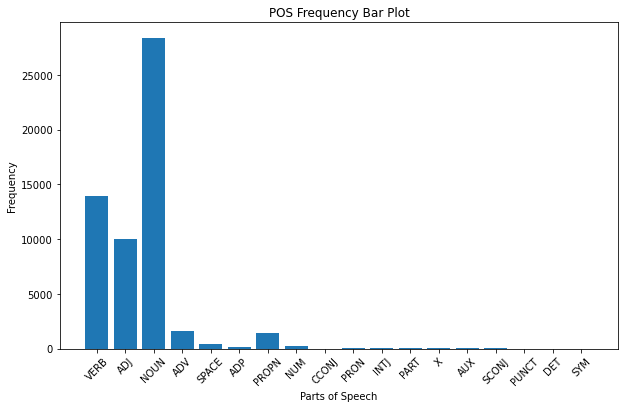

In [348]:
import matplotlib.pyplot as plt
from collections import Counter

pos_counts = Counter(pos)

words, frequencies = zip(*pos_counts.items())

plt.figure(figsize=(10, 6)) 
plt.bar(words, frequencies)

plt.xlabel('Parts of Speech')
plt.ylabel('Frequency')
plt.title('POS Frequency Bar Plot')

plt.xticks(rotation=45)

plt.show()


In [349]:
ent_labels=[]

for i in range(training_data.shape[0]):
    doc=nlp(training_data["processed_text"][i])
    for ent in doc.ents:
        ent_labels.append(ent.label_)

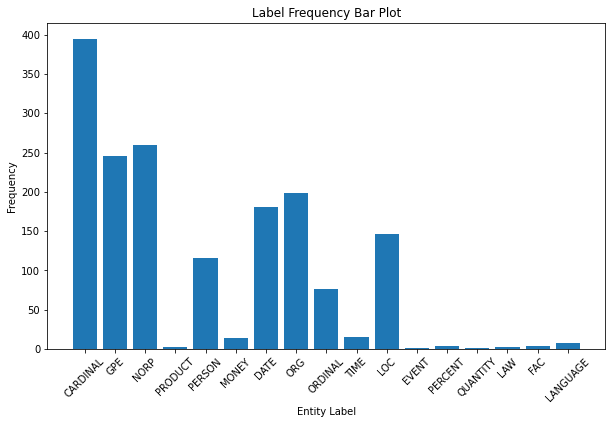

In [350]:
ents_counts = Counter(ent_labels)

words, frequencies = zip(*ents_counts.items())

plt.figure(figsize=(10, 6)) 
plt.bar(words, frequencies)

plt.xlabel('Entity Label')
plt.ylabel('Frequency')
plt.title('Label Frequency Bar Plot')

plt.xticks(rotation=45)

plt.show()

In [351]:
from spacy import displacy

In [352]:
doc=nlp(training_data["processed_text"][0])

html=displacy.render(doc, style="dep")

## model

In [353]:
training_data["processed_text"]

0       we should ban human cloning as it will only ca...
1       fast food should be banned because it is reall...
2       sometimes economic sanctions are the only thin...
3       capital punishment is sometimes the only optio...
4       factory farming allows for the production of c...
                              ...                        
5387    on the one hand we have russia killing countle...
5388    the subsidies were originally intended to ensu...
5389    these products come mainly from large enterpri...
5390    subsidies often make farmers in recipient coun...
5391    the eu can not endlessly lean on america or na...
Name: processed_text, Length: 5392, dtype: object

In [354]:
training_data["label"]

0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.333...
                              ...                        
5387    [0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0...
5388    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...
5389    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5390    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.166...
5391    [0.0, 0.25, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0...
Name: label, Length: 5392, dtype: object

In [355]:
# converting processed text and related labels to tuples in order to make it suitable for spacy

training_data['tuples'] = training_data.apply(
    lambda row: (row['processed_text'],row['label']), axis=1)
train = training_data['tuples'].tolist()
train[:1]

[('we should ban human cloning as it will only cause huge issues when you have a bunch of the same humans running around all acting the same',
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   1.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0])]

In [356]:
train[2]

('sometimes economic sanctions are the only thing that will get the corrupt governments to take action',
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5,
  0.0,
  0.0,
  0.0,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])